In [22]:
import pandas as pd

def_actions = pd.read_excel('def_actions.xlsx')
misc = pd.read_excel('miscellaneous.xlsx')
passes = pd.read_excel('passes.xlsx')
shooting = pd.read_excel('shooting.xlsx')
possession = pd.read_excel('possession.xlsx')

In [23]:
for df in [def_actions, misc, passes, shooting, possession]:
    df['Player'] = df['Player'].str.strip()

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# 0. CONFIGURAÇÕES
# ============================================================
jogadores = ['John Kennedy', 'Everaldo Stum', 'Germán Cano']

metrics = {
    'Gols/90': 'Gls/90',
    'Gols Esperados/90': 'xG/90',
    'Chutes/90': 'Sh/90',
    'Chutes no Gol/90': 'SoT/90',
    'Chutes no Gol %': 'SoT%',
    'Assistencias/90': 'Ast/90',
    'Passes Chave/90': 'KP/90',
    'xA/90': 'xA/90',
    'Toques na último terço/90': 'Att 3rd/90',
    'Disputas Aéreas %': 'Won%',
    'Passes para o terço final/90': 'FinalThird/90',
    'Faltas Sofridas/90': 'Fld/90'
}

# ============================================================
# 1. SELEÇÃO DE COLUNAS
# ============================================================
misc_cols = [
    'Player','Squad','Pos', '90s',
    'Won', 'Won%', 'Fld'
]

pass_cols = [
    'Player','Squad', 'Cmp%',
    'Ast', 'PrgP', 'KP', 'xA','FinalThird'
]

poss_cols = [
    'Player','Squad',
    'PrgC', 'CarriesFinalThird', 'Att 3rd'
]

shoot_cols = [
    'Player', 'Squad', 'Sh', 'Gls', 'SoT', 'SoT%', 'xG'
]


misc_df = misc[misc_cols].copy()

misc_df['90s'] = pd.to_numeric(misc_df['90s'], errors='coerce')
misc_df['Won'] = pd.to_numeric(misc_df['Won'], errors='coerce')
misc_df['Won%'] = pd.to_numeric(misc_df['Won%'], errors='coerce')
misc_df['Fld'] = pd.to_numeric(misc_df['Fld'], errors='coerce')

misc_df = (
    misc_df
    .groupby(['Player', 'Squad','Pos'], as_index=False)
    .agg({
        '90s': 'max',
        'Won': 'sum',
        'Won%': 'mean',
        'Fld': 'sum'
    })
)


pass_df = passes[pass_cols].copy()

for col in ['Cmp%' , 'Ast', 'PrgP', 'KP', 'xA', 'FinalThird']:
    pass_df[col] = pd.to_numeric(pass_df[col], errors='coerce')

pass_df = (
    pass_df
    .groupby(['Player', 'Squad'], as_index=False)
    .agg({
        'Cmp%': 'mean',
        'Ast': 'sum',
        'PrgP': 'sum',
        'KP': 'sum',
        'xA': 'sum',
        'FinalThird': 'sum'
    })
)

poss_df = possession[poss_cols].copy()

for col in ['PrgC', 'CarriesFinalThird','Att 3rd']:
    poss_df[col] = pd.to_numeric(poss_df[col], errors='coerce')

poss_df = (
    poss_df
    .groupby(['Player', 'Squad'], as_index=False)
    .agg({
        'PrgC': 'sum',
        'CarriesFinalThird': 'sum',
        'Att 3rd': 'sum'
    })
)

shoot_df = shooting[shoot_cols].copy()

for col in ['Sh','Gls', 'SoT', 'SoT%', 'xG']:
    shoot_df[col] = pd.to_numeric(shoot_df[col], errors='coerce')

shoot_df = (
    shoot_df
    .groupby(['Player', 'Squad'], as_index=False)
    .agg({
        'Sh': 'sum',
        'Gls': 'sum',
        'SoT': 'sum',
        'xG': 'sum',
        'SoT%': 'mean'
    })
)

# ============================================================
# 2. MERGE
# ============================================================
df = (
    misc_df
    .merge(pass_df, on=['Player', 'Squad'], how='left', validate='one_to_one')
    .merge(poss_df, on=['Player', 'Squad'], how='left', validate='one_to_one')
    .merge(shoot_df, on=['Player', 'Squad'], how='left', validate='one_to_one')
)


# Criar métricas /90
df['Gls/90']    = df['Gls'] / df['90s']
df['Sh/90']   = df['Sh'] / df['90s']
df['SoT/90']   = df['SoT'] / df['90s']
df['xG/90']   = df['xG'] / df['90s']
df['Ast/90']    = df['Ast'] / df['90s']
df['KP/90']    = df['KP'] / df['90s']
df['xA/90']   = df['xA'] / df['90s']
df['Att 3rd/90'] = df['Att 3rd'] / df['90s']
df['FinalThird/90']   = df['FinalThird'] / df['90s']
df['Fld/90']   = df['Fld'] / df['90s']
df['CarriesFinalThird/90']   = df['CarriesFinalThird'] / df['90s']


In [25]:
# ============================================================
# 4. MANTER APENAS A PASSAGEM COM MAIS MINUTOS
# ============================================================
'''df = df.sort_values('90s', ascending=False)
df = df.drop_duplicates(subset='Player', keep='first')
'''

"df = df.sort_values('90s', ascending=False)\ndf = df.drop_duplicates(subset='Player', keep='first')\n"

In [26]:
df_ref = df[
    (df['90s'] >= 6.9) &
    (df['Pos'].isin(['FW', 'FW,MF']))
].copy()



📊 COMPARAÇÃO — ATACANTES DO FLUMINENSE

🔰 Everaldo Stum

Gols/90: 0.13 (89º/116)
Gols Esperados/90: 0.27 (56º/116)
Chutes/90: 2.53 (43º/116)
Chutes no Gol/90: 0.73 (70º/116)
Chutes no Gol %: 28.9% (95º/116)
Assistencias/90: 0.00 (94º/116)
Passes Chave/90: 1.13 (63º/116)
xA/90: 0.11 (65º/116)
Toques na último terço/90: 11.80 (102º/116)
Disputas Aéreas %: 55.9% (7º/116)
Passes para o terço final/90: 0.93 (81º/116)
Faltas Sofridas/90: 1.73 (65º/116)

---------------------------------------------

🔰 Germán Cano

Gols/90: 0.36 (27º/116)
Gols Esperados/90: 0.31 (42º/116)
Chutes/90: 2.47 (46º/116)
Chutes no Gol/90: 0.72 (71º/116)
Chutes no Gol %: 29.3% (93º/116)
Assistencias/90: 0.00 (94º/116)
Passes Chave/90: 0.54 (106º/116)
xA/90: 0.05 (99º/116)
Toques na último terço/90: 9.64 (114º/116)
Disputas Aéreas %: 21.6% (99º/116)
Passes para o terço final/90: 1.20 (58º/116)
Faltas Sofridas/90: 1.51 (80º/116)

---------------------------------------------

🔰 John Kennedy

Gols/90: 0.29 (47º/116)
Go

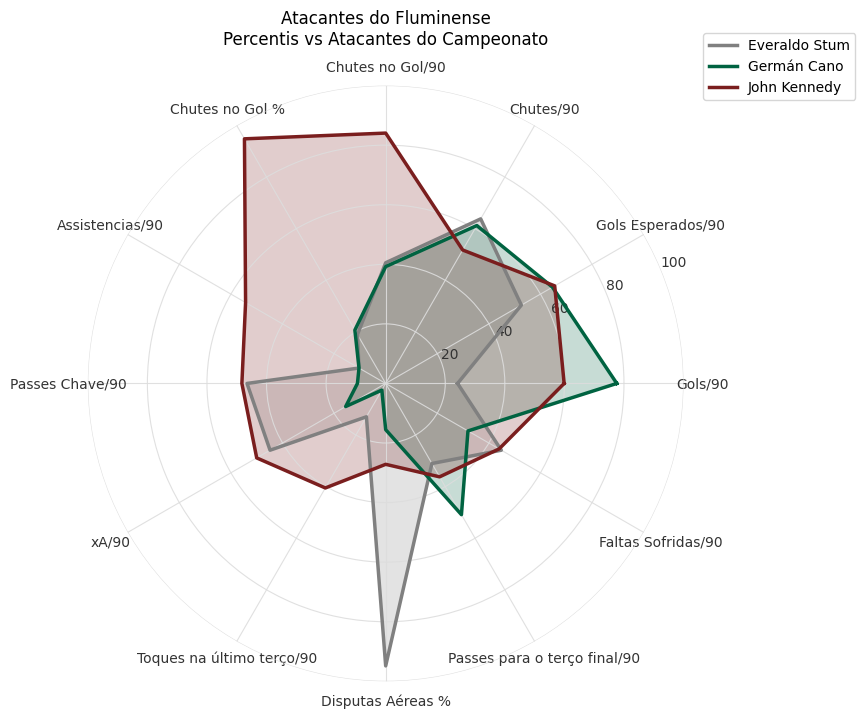

In [27]:
# ============================================================
# CORES DO FLUMINENSE
# ============================================================
cores = {
    'John Kennedy': '#7A1E1E',
    'Germán Cano': '#006341',
    'Everaldo Stum': '#808080'
}

# ============================================================
# 6. RANKING POR MÉTRICA (BASE = ATACANTES)
# ============================================================
for col in metrics.values():
    df_ref[f'{col}_rank'] = (
        df_ref[col]
        .rank(ascending=False, method='min')
    )

total_df = len(df_ref)

# ============================================================
# 7. SELECIONAR ATACANTES DO FLUMINENSE
# ============================================================
df_players = df_ref[df_ref['Player'].isin(jogadores)].copy()

# ============================================================
# 8. COMPARAÇÃO
# ============================================================
print('\n📊 COMPARAÇÃO — ATACANTES DO FLUMINENSE\n')

for _, row in df_players.iterrows():
    print(f'🔰 {row["Player"]}\n')

    for nome, col in metrics.items():
        valor = row[col]
        rank = int(row[f'{col}_rank'])

        if '%' in nome:
            valor_fmt = f'{valor:.1f}%'
        else:
            valor_fmt = f'{valor:.2f}'

        print(f'{nome}: {valor_fmt} ({rank}º/{total_df})')

    print('\n' + '-'*45 + '\n')

# ============================================================
# 9. RADAR — PERCENTIS VS ATACANTES DO CAMPEONATO
# ============================================================
for col in metrics.values():
    df_ref[f'{col}_pct'] = (
        df_ref[col]
        .rank(pct=True) * 100
    )

df_players = df_ref[df_ref['Player'].isin(jogadores)]

labels = list(metrics.keys())
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
angles = np.append(angles, angles[0])

plt.figure(figsize=(9, 9))
ax = plt.subplot(111, polar=True)

for _, row in df_players.iterrows():
    values = [row[f'{col}_pct'] for col in metrics.values()]
    values.append(values[0])

    color = cores.get(row['Player'], '#006341')

    ax.plot(
        angles,
        values,
        linewidth=2.5,
        label=row['Player'],
        color=color
    )

    ax.fill(
        angles,
        values,
        color=color,
        alpha=0.22
    )

ax.set_ylim(0, 100)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.grid(color='#DDDDDD', alpha=0.9)
ax.spines['polar'].set_visible(False)
ax.tick_params(colors='#333333')


ax.set_title(
    'Atacantes do Fluminense\nPercentis vs Atacantes do Campeonato',
    pad=30
)

ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()